In [1]:
# utilities
import pandas as pd
import re
import time
import matplotlib.pyplot as plt

# nlp
import nltk
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('wordnet') 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # !pip install vaderSentiment

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/odemunoogelohwohor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/odemunoogelohwohor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/odemunoogelohwohor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
# Load the CSV file
df = pd.read_csv('../zoom_preprocessed.csv')
display(df.head())


,Unnamed: 0,Date,tweet
0,0,2020-01-01,replying USER USER
1,1,2020-01-01,replying USER
2,2,2020-01-01,205 roi last month 800 400 right another amazi...
3,4,2020-01-01,brokerage set zoom video communication inc zm ...
4,5,2020-01-01,60k buy newyearseve newyears newyearseve2020 t...


In [59]:
df = df.drop(columns=['Unnamed: 0'])

In [60]:
df.head()

,Date,tweet
0,2020-01-01,replying USER USER
1,2020-01-01,replying USER
2,2020-01-01,205 roi last month 800 400 right another amazi...
3,2020-01-01,brokerage set zoom video communication inc zm ...
4,2020-01-01,60k buy newyearseve newyears newyearseve2020 t...


In [61]:
df['tweet'] = df['tweet'].astype('str')

In [62]:
df = df[~df['tweet'].str.contains('replying')]
df.head()

,Date,tweet
2,2020-01-01,205 roi last month 800 400 right another amazi...
3,2020-01-01,brokerage set zoom video communication inc zm ...
4,2020-01-01,60k buy newyearseve newyears newyearseve2020 t...
5,2020-01-01,zm zoom nasdaq zm cfo see much bigger opportun...
6,2020-01-02,view stock trading higher expectation entry ex...


# EDA and Visualizations on Cleaned Headlines

## Frequency Distribution

In [63]:
# Create a frequency distribution of the cleaned words
def frequency_distribution(df_title, zoom_stock_words, stock_words):
    all_words = []
    for text in df[df_title]:
        all_words.extend(text.split())
    freq_dist = nltk.FreqDist(all_words)

    # pop some obvious words: 
    # display(freq_dist)

    for word in zoom_stock_words:
        freq_dist.pop(word)

    for word in stock_words:
        freq_dist.pop(word)

    return freq_dist

## Wordcloud on top 100 words

In [64]:
# Create a wordcloud based on the frequency distribution (top 100 words)
def stock_wordcloud(freq_dist, year, stock):
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(freq_dist)

    # Plot the wordcloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title("100 most frequent words related to " + stock + " stocks across tweets in " + year)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig("wordcloud_" + year + "_" + stock + "_tweets.png")
    plt.show()

## Barplot on top 20 words

In [65]:
# extract the top 20 words and their frequencies
def stock_barplot(freq_dist, stock, year):
    top_words = freq_dist.most_common(20)[::-1]
    top_words_dict = dict(top_words)

    # create a bar plot
    plt.barh(list(top_words_dict.keys()), list(top_words_dict.values()))

    # set the x-axis label
    plt.xlabel('Frequency')

    # set the y-axis label
    plt.ylabel('Words')

    # display the plot
    plt.title("20 most frequent words related to " + stock + " stocks across tweets in " + year)
    plt.savefig("barplot_" + year + "_" + stock + "_tweets.png")
    plt.show()

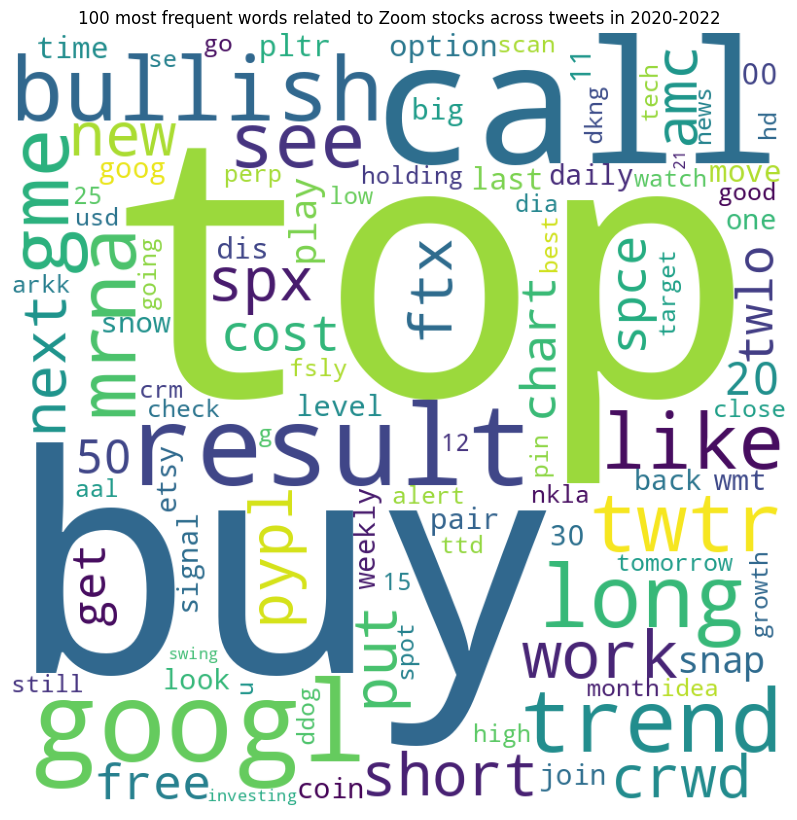

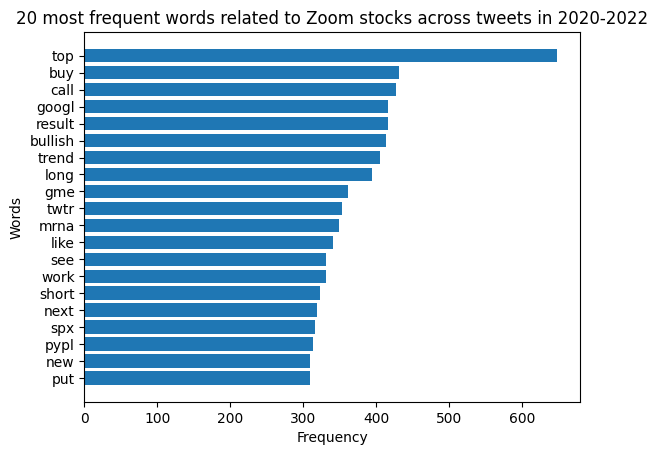

In [66]:
# save length of news headlines
with open('2020-2022-zoom-tweet-count.txt', 'w') as f:
    # redirect print statement to write to file
    print("The number of tweets in this 2020-2022 Zoom dataframe: ", len(df), file=f)

# get freq distribution
df_title = 'tweet'
zoom_stock_words = ['zoom', 'video', 'communication', 'zm']
stock_words = ['URL', 'user', 'USER', 'stock', 'dollar', 'cent', 'price', 'percent', 'earnings', 'market', 'share', 'company',
               'nasdaq','inc', 'say', 'per', 'cathie', 'wood', '2021', '2022', '2020', 'year', 'analyst',
               'tsla', 'aapl', 'msft', 'fb', 'nflx', 'nvda', 'today', 'spy', 'amzn', 'ba', 'amd', 'roku',
               'day', 'qq', 'week', 'baba', 'sq', 'tdoc', '10', 'shop', 'nio', 'trade', 'bynd', 'pton',
               'docu', 'trading']  # other words: dj

freq_dist = frequency_distribution(df_title, zoom_stock_words, stock_words)
    
# plot stock words
year = "2020-2022"
stock = "Zoom"
stock_wordcloud(freq_dist, year, stock)
stock_barplot(freq_dist, stock, year)

# VADER Sentiment Analysis on Raw Headlines

Sentiment140 is a machine learning-based model that uses a large corpus of labeled data to classify text as positive, negative, or neutral. It can be useful if you have a large dataset and you want to classify the sentiment of text in a relatively automated way. However, it may not be as accurate or nuanced as VADER in certain contexts, and may require more training data and tuning to perform well.

VADER, on the other hand, is a rule-based model that is specifically designed for analyzing social media text. It has been shown to perform well in analyzing short, informal text such as tweets, and it takes into account sentiment-laden words, emoticons, and punctuation. It also has a built-in mechanism for handling negations and intensifiers, which can be important for accurately assessing sentiment in context. Overall, VADER can be a good choice if you are analyzing text from social media or other informal contexts where language may be more nuanced and difficult to classify using traditional sentiment analysis methods.

VADER is designed to work well **without preprocessing steps** such as removing punctuation and stopwords, but you can still experiment with preprocessing and see if it improves the accuracy of your sentiment analysis.

In [67]:
# Initialize the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

## Calculate the sentiment scores for each news headline using VADER

In [68]:
# Define a function to calculate the sentiment scores for each news headline
def calculate_sentiment_scores(headline):
    scores = analyzer.polarity_scores(headline)
    return scores['compound']

# Define a function to label the sentiment based on the sentiment score
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def each_headline_sentiment(df, df_col, stock, year):
    # Add a new column to your dataframe to store the sentiment scores
    df['sentiment_score'] = df[df_col].apply(calculate_sentiment_scores)

    # Add another column to your dataframe to store the sentiment labels
    df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

    # Print the dataframe with the sentiment scores and labels
    display(df.head())
    df.to_csv(stock + '_sentiment_'+ year + '_tweets.csv', index=False)


In [69]:
# Load the CSV file
# df = pd.read_csv('../zoom_preprocessed.csv')
# df.head()

df_col = 'tweet'
year = "2021-2022"
stock = "Zoom"
each_headline_sentiment(df, df_col, stock, year)

,Date,tweet,sentiment_score,sentiment_label
2,2020-01-01,205 roi last month 800 400 right another amazi...,0.8316,Positive
3,2020-01-01,brokerage set zoom video communication inc zm ...,0.0000,Neutral
4,2020-01-01,60k buy newyearseve newyears newyearseve2020 t...,-0.7506,Negative
5,2020-01-01,zm zoom nasdaq zm cfo see much bigger opportun...,0.4215,Positive
6,2020-01-02,view stock trading higher expectation entry ex...,0.3400,Positive


## Calculate average sentiment per day using VADER

In [70]:
def avg_sentiment_df(analyzer, df, df_col, label_sentiment, stock, year):
    # Calculate the sentiment score for each tweet
    df['sentiment_score'] = df[df_col].apply(lambda x: analyzer.polarity_scores(x)['compound'])

    # Convert the date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

    # Calculate the average sentiment score by day
    df_avg = df.groupby('Date').agg({'sentiment_score': 'mean'})

    # Apply the label_sentiment function to the sentiment_score column
    df_avg['sentiment_label'] = df_avg['sentiment_score'].apply(lambda x: label_sentiment(x))

    # Print the resulting DataFrame
    display(df_avg)
    df_avg.to_csv(stock + '_avg_sentiment_'+ year + '_tweets.csv', index=True)


In [71]:
# # Load the CSV file
# df = pd.read_csv('../../data/zoom/2020-2022_webull_zoom_stock_news.csv')
# df.head()

df_col = 'tweet'
year = "2020-2022"
stock = "Zoom"
avg_sentiment_df(analyzer, df, df_col, label_sentiment, stock, year)

,sentiment_score,sentiment_label
Date,,
2020-01-01,0.125625,Positive
2020-01-02,-0.051600,Negative
2020-01-03,0.005700,Neutral
2020-01-04,0.472400,Positive
2020-01-05,0.301233,Positive
...,...,...
2022-12-26,-0.149525,Negative
2022-12-27,0.238075,Positive
2022-12-28,0.468175,Positive


## Plot average VADER sentiment score per day

In [76]:
def vader_plot(df, year, stock):
    # Create a line plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['Date'], df['sentiment_score'], color='blue')

    # Set plot title and axis labels
    ax.set_title('VADER Sentiment Score for ' + year + ' ' + stock + ' Stocks Tweets per Date')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Score')

    # Add horizontal lines and labels for positive and negative sentiment thresholds
    ax.axhline(y=0.05, color='green', linestyle='--', label='Above Line: Positive')
    ax.axhline(y=-0.05, color='red', linestyle='--', label='Below Line: Negative')
    ax.legend()

    # Show plot
    plt.savefig(year + "_VADER_sentiment_" + stock + ".png")
    plt.show()


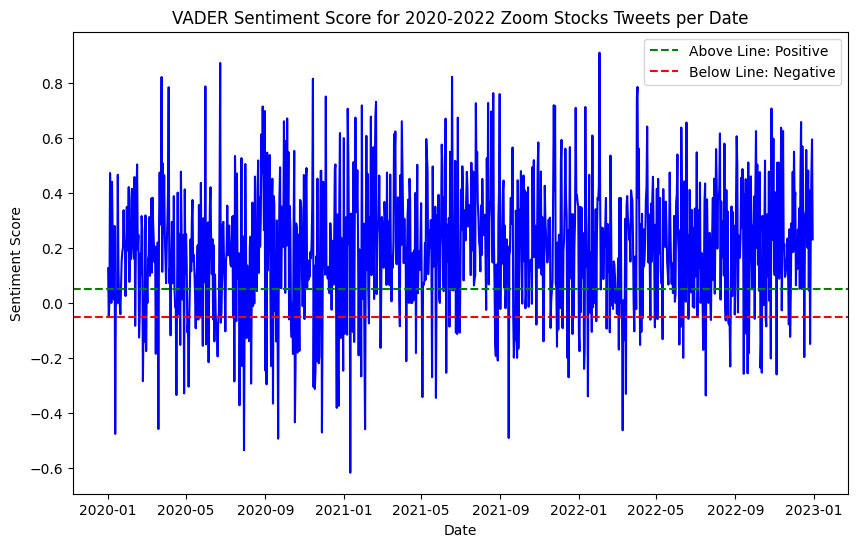

In [77]:
df = pd.read_csv('Zoom_avg_sentiment_2020-2022_tweets.csv', parse_dates=['Date'])
vader_plot(df, year, stock)

## Plot sentiment label count

In [78]:
def count_sentiment_label(df, year, stock):
    # count the number of each sentiment label
    counts = df['sentiment_label'].value_counts()

    # create a bar plot
    plt.bar(counts.index, counts.values)

    # Set plot title
    plt.title('VADER Sentiment Labels for ' + year + ' ' + stock + ' Stocks Tweets')

    # set the x-axis label
    plt.xlabel('Sentiment Label')

    # set the y-axis label
    plt.ylabel('Count')

    # display the plot
    plt.savefig(year + "_VADER_sentiment_count_" + stock + ".png")
    plt.show()

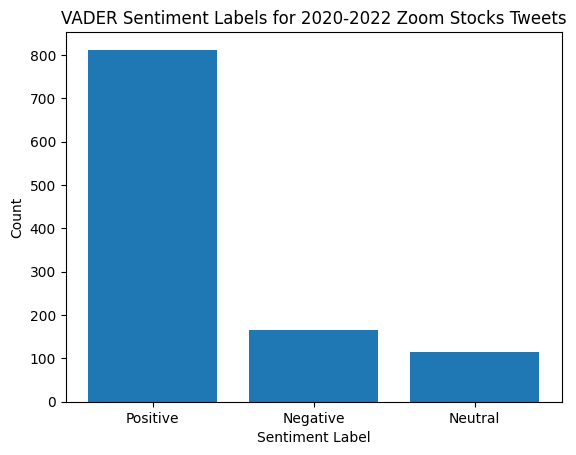

In [79]:
df = pd.read_csv('Zoom_avg_sentiment_2020-2022_tweets.csv', parse_dates=['Date'])
count_sentiment_label(df, year, stock)